# Vegetable Price Prediction Using Machine Learning
Implemented for Bhopal, Bhopal(F&V) market (Commodity = Tomato) 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
%matplotlib inline

# Reading Dataset
Vegetable Data is taken from https://agmarknet.gov.in

In [3]:
vegetables = pd.read_csv('Bhopal_Tomato.csv')
vegetables.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Bhopal,Bhopal(F&V),Tomato,Other,FAQ,1000,1500,1200,31-Dec-19
1,2,Bhopal,Bhopal(F&V),Tomato,Other,FAQ,1000,2000,1500,30-Dec-19
2,3,Bhopal,Bhopal(F&V),Tomato,Other,FAQ,1000,1500,1200,29-Dec-19
3,4,Bhopal,Bhopal(F&V),Tomato,Other,FAQ,1000,2000,1500,28-Dec-19
4,5,Bhopal,Bhopal(F&V),Tomato,Other,FAQ,1000,1500,1200,27-Dec-19


# Data Selection

select District Name == Bhopal <br>
Select Market Name == Bhopal(F&V) <br>
Then Select Variety == Tomato

In [4]:
vegetables = vegetables[vegetables['District Name'] == "Bhopal"]
vegetables = vegetables[vegetables['Market Name'] == "Bhopal(F&V)"]
vegetables = vegetables[vegetables['Commodity'] == "Tomato"]
vegetables.head()

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
0,1,Bhopal,Bhopal(F&V),Tomato,Other,FAQ,1000,1500,1200,31-Dec-19
1,2,Bhopal,Bhopal(F&V),Tomato,Other,FAQ,1000,2000,1500,30-Dec-19
2,3,Bhopal,Bhopal(F&V),Tomato,Other,FAQ,1000,1500,1200,29-Dec-19
3,4,Bhopal,Bhopal(F&V),Tomato,Other,FAQ,1000,2000,1500,28-Dec-19
4,5,Bhopal,Bhopal(F&V),Tomato,Other,FAQ,1000,1500,1200,27-Dec-19


In [5]:
vegetables['Price Date'] = pd.to_datetime(vegetables['Price Date'])
vegetables['Price Date'] = vegetables['Price Date'].dt.day
vegetables = vegetables.iloc[::-1]
vegetables.tail(10)

,Sl no.,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date
9,10,Bhopal,Bhopal(F&V),Tomato,Other,FAQ,1000,2000,1500,22
8,9,Bhopal,Bhopal(F&V),Tomato,Other,FAQ,1000,1500,1200,23
7,8,Bhopal,Bhopal(F&V),Tomato,Other,FAQ,1000,1500,1200,24
6,7,Bhopal,Bhopal(F&V),Tomato,Other,FAQ,1000,1500,1200,25
5,6,Bhopal,Bhopal(F&V),Tomato,Other,FAQ,1000,1500,1200,26
4,5,Bhopal,Bhopal(F&V),Tomato,Other,FAQ,1000,1500,1200,27
3,4,Bhopal,Bhopal(F&V),Tomato,Other,FAQ,1000,2000,1500,28
2,3,Bhopal,Bhopal(F&V),Tomato,Other,FAQ,1000,1500,1200,29
1,2,Bhopal,Bhopal(F&V),Tomato,Other,FAQ,1000,2000,1500,30
0,1,Bhopal,Bhopal(F&V),Tomato,Other,FAQ,1000,1500,1200,31


# Reading Climate Data
Weather Data is taken from https://www.wunderground.com/ 

In [6]:
climate = pd.read_csv('climate_Bhopal_270.csv')
vegetables.reset_index(inplace=True)
vegetables[['Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min','Pressure_Avg','Precipitation_Total']] = climate[['Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min', 'Pressure_Avg', 'Precipitation_Total']]
print(vegetables.head())
data = vegetables[['Price Date', 'Modal Price (Rs./Quintal)', 'Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min','Pressure_Avg', 'Precipitation_Total']] 
X = vegetables[['Price Date','Temp_Max', 'Temp_Avg', 'Temp_Min', 'Dew_Max', 'Dew_Avg', 'Dew_Min', 'Humid_Max', 'Humid_Avg','Humid_Min','Wind_Max','Wind_Avg','Wind_Min', 'Pressure_Avg', 'Precipitation_Total']]
y = vegetables[['Modal Price (Rs./Quintal)']]
print(X.shape)

   index  Sl no. District Name  Market Name Commodity Variety Grade  \
0    345     346        Bhopal  Bhopal(F&V)    Tomato   Other   FAQ   
1    344     345        Bhopal  Bhopal(F&V)    Tomato   Other   FAQ   
2    343     344        Bhopal  Bhopal(F&V)    Tomato   Other   FAQ   
3    342     343        Bhopal  Bhopal(F&V)    Tomato   Other   FAQ   
4    341     342        Bhopal  Bhopal(F&V)    Tomato   Other   FAQ   

   Min Price (Rs./Quintal)  Max Price (Rs./Quintal)  \
0                      600                     1000   
1                      600                     1000   
2                      600                     1000   
3                      600                     1000   
4                      600                     1000   

   Modal Price (Rs./Quintal)  ...    Dew_Avg    Dew_Min  Humid_Max  Humid_Avg  \
0                        800  ...  64.259259  60.437037  81.574074  62.629630   
1                        800  ...  64.211111  60.400000  81.685185  62.755556   

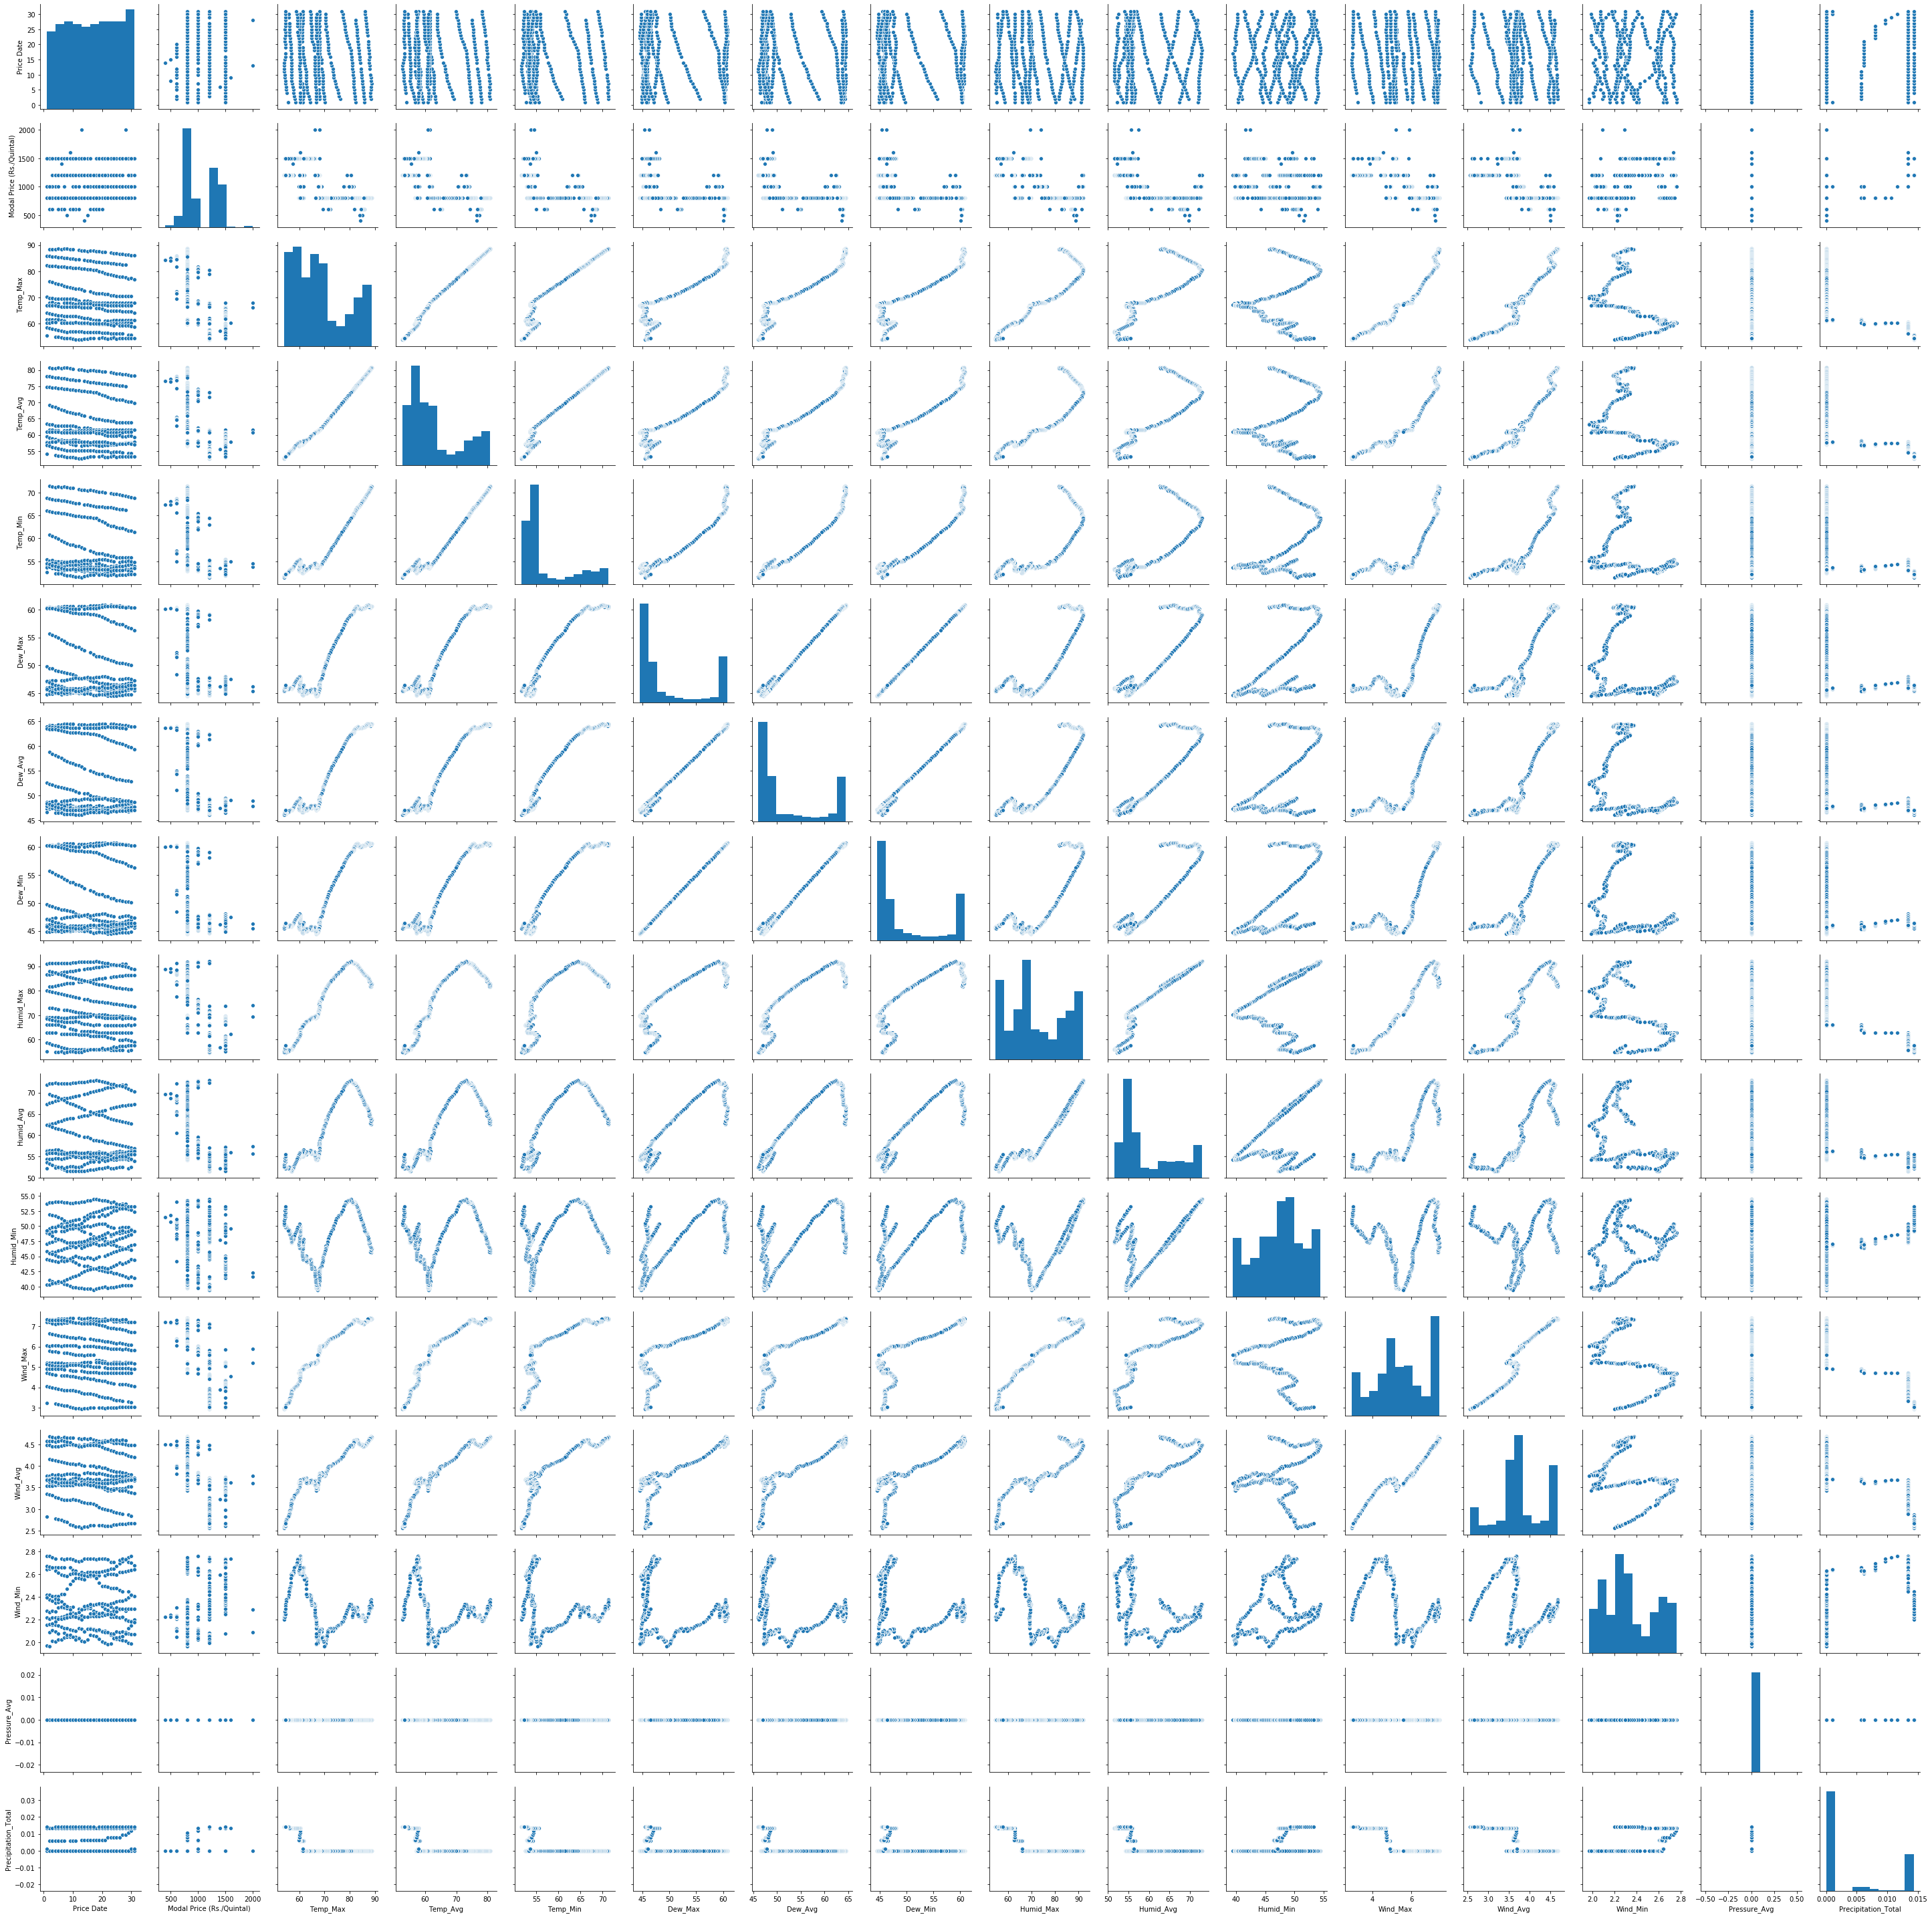

In [6]:
sns.pairplot(data)

# Data is splitted into train and test set.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import math

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X[:-1], y[:-1], test_size=0.3, random_state=42, shuffle = True)

# Implementation Of Algorithm 
Implementing Random Forest algorithm

In [9]:
start = time.time()
regr = RandomForestRegressor(n_estimators = 1000,max_depth=1000, random_state=20, criterion="mae", min_samples_split=2, oob_score = True)
regr.fit(X_train,np.reshape(np.array(y_train), (len(y_train), )))
end = time.time()
print(f"Runtime of the program is {end - start}")

Runtime of the program is 10.160327672958374


In [10]:
predicted = regr.predict(X_test)

# Accuracy For Training and Testing Set

In [11]:
#print(y_test, predicted)
print(regr.score(X_train, y_train))
print(regr.score(X_test, y_test))

0.9599955537968464
0.7820144955569333


# Feature Importance

In [12]:
a = np.reshape(regr.feature_importances_, (len(regr.feature_importances_),1))
a = a.tolist()
col = X.columns
for i in range(0,15):
    print(col[i],  "->" , a[i][0])

Price Date -> 0.03756167479924464
Temp_Max -> 0.2510592707640854
Temp_Avg -> 0.03904830568532348
Temp_Min -> 0.04897661218186901
Dew_Max -> 0.023449598042251066
Dew_Avg -> 0.030199426998885486
Dew_Min -> 0.022470706364939797
Humid_Max -> 0.058548694777011724
Humid_Avg -> 0.23397566409912943
Humid_Min -> 0.06000852527613363
Wind_Max -> 0.06856258288935196
Wind_Avg -> 0.04547673727238103
Wind_Min -> 0.043696571338448946
Pressure_Avg -> 0.0
Precipitation_Total -> 0.03696562951094441


# predicted vs Actual

In [13]:
b= y_test.values
b = b.reshape((len(b),))
l = len(b)
sum_a = 0
for i in range(len(predicted)):
    print(str(predicted[i]) +"->"+ str(b[i]))
    sum_a = sum_a + abs(predicted[i] - b[i])

1480.4->1500
1182.1->1200
1129.6->1000
1430.6->1500
1237.0->1200
1281.0->1200
1219.8->1200
1104.6->1000
796.8->800
1233.3->1200
1206.2->1200
765.6->800
744.0->800
798.0->800
1232.5->1200
802.0->800
800.4->800
1186.1->1200
1211.0->1200
835.6->800
1002.1->1000
796.6->800
1215.0->1200
799.6->800
1177.3->1000
1205.4->1200
799.6->800
1523.7->1500
1129.3->1200
1086.7->1200
812.7->800
1126.2->1200
1219.4->1200
797.8->800
687.8->600
795.2->800
1447.6->1500
1483.3->1500
800.6->800
1477.3->1500
1382.3->1500
1278.5->1200
1215.0->1500
821.6->1000
798.3->800
725.8->600
1016.7->1000
808.2->800
797.4->800
1493.3->1500
824.9->800
851.0->800
1203.1->1200
715.3->600
788.7->800
1479.0->1500
757.0->800
881.7->800
875.3->800
861.2->800
877.8->800
802.5->800
1224.2->1200
791.6->800
1205.5->1200
880.9->800
1020.8->1000
812.0->1200
797.5->800
812.7->1000
1032.9->1000
799.4->800
1130.2->2000
1213.3->1200
1257.6->1200
1230.6->1200
805.9->800
1149.6->1000
799.0->800
926.9->800
798.2->800
1210.5->1200
890.4->800


In [14]:
print(sum_a/l)

65.20961538461539


# Create picke file

In [15]:
import pickle
filename = 'Bhopal_Tomato'
outfile = open(filename,'wb')
pickle.dump(regr,outfile)
outfile.close()

In [16]:
filename = 'Bhopal_Tomato'
with open(filename, "rb") as f:
    rf = pickle.load(f)
predicted = rf.predict(X)
actual= np.reshape(np.array(y),(len(y),))
#print(predicted,actual)
sum = 0
for i in range(len(predicted)):
    #print(str(actual[i]) + "->" + str(predicted[i]))
    sum = sum +abs(actual[i] - predicted[i])
f.close()

# Total Error

In [17]:
print(sum/len(actual)) 

46.31994219653177
